# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hubbal Kholiq Habbaza
- **Email:** habbazahubbal@gmail.com
- **ID Dicoding:** hubbal

## Menentukan Pertanyaan Bisnis

1. Kapan permintaan sepeda paling tinggi dan rendah?
2. Bagaimana faktor cuaca mempengaruhi jumlah penyewaan sepeda?
3. Bagaimana perbedaan jumlah penyewaan antara hari kerja dan akhir pekan?
4. Bagaimana pengelompokan hari berdasarkan pola penyewaan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
# Load datasets
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

# Display first few rows
display(day_df.head())
display(hour_df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset yang digunakan
    - Terdapat dua dataset utama:
        - day.csv: Data penyewaan sepeda yang dicatat berdasarkan hari.
        - hour.csv: Data penyewaan sepeda yang dicatat berdasarkan jam.
    - Kedua dataset memiliki informasi yang saling melengkapi untuk memahami pola penyewaan sepeda secara harian dan jam.
- Struktur Data
    - Dataset day.csv memiliki jumlah observasi lebih sedikit dibandingkan hour.csv karena berskala harian.
    - Dataset hour.csv lebih detail karena mencatat transaksi setiap jam, memungkinkan analisis tren waktu yang lebih granular.

### Assessing Data

In [4]:
# Check missing values
print(day_df.isnull().sum())
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [5]:
# Check duplicate values
print(f"Duplicate rows in day.csv: {day_df.duplicated().sum()}")
print(f"Duplicate rows in hour.csv: {hour_df.duplicated().sum()}")

Duplicate rows in day.csv: 0
Duplicate rows in hour.csv: 0


In [6]:
# Display data types
display(day_df.info())
display(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


None

**Insight:**
- Tidak ada missing values dalam dataset.
- Tidak ditemukan duplikasi data.
- Kolom tanggal perlu dikonversi ke format datetime agar lebih mudah dianalisis.

### Cleaning Data

In [7]:
# Convert date column to datetime format
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Drop irrelevant columns
day_df_clean = day_df.drop(columns=['instant'])
hour_df_clean = hour_df.drop(columns=['instant'])

**Insight:**
- xxx
- Kolom `dteday` sudah dikonversi ke format datetime.
- Kolom `instant` yang tidak diperlukan telah dihapus.

## Exploratory Data Analysis (EDA)

### EDA Univariate : Melakukan eksplorasi distribusi data pada setiap variabel.

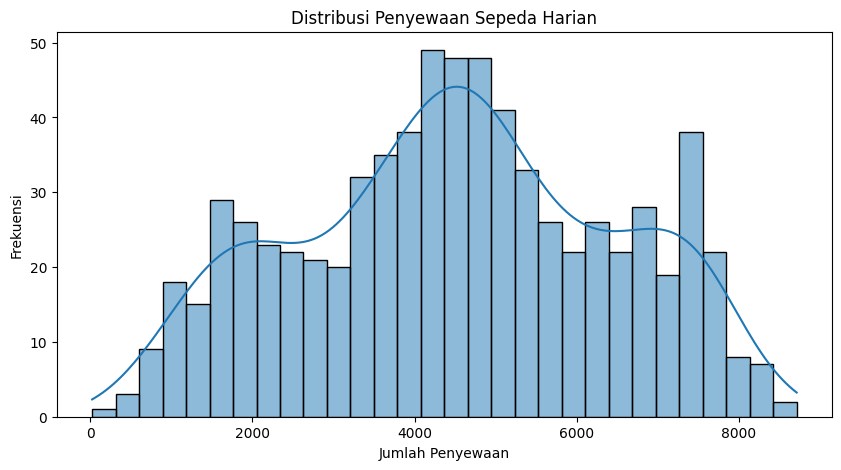

In [8]:
# Distribusi jumlah penyewaan sepeda harian
plt.figure(figsize=(10,5))
sns.histplot(day_df_clean['cnt'], bins=30, kde=True)
plt.title("Distribusi Penyewaan Sepeda Harian")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

**Insight:**
- Distribusi jumlah penyewaan sepeda cenderung tidak simetris, menunjukkan adanya variasi dalam pola penyewaan.

### EDA Bivariate : Menganalisis hubungan antara dua variabel untuk memahami keterkaitannya.

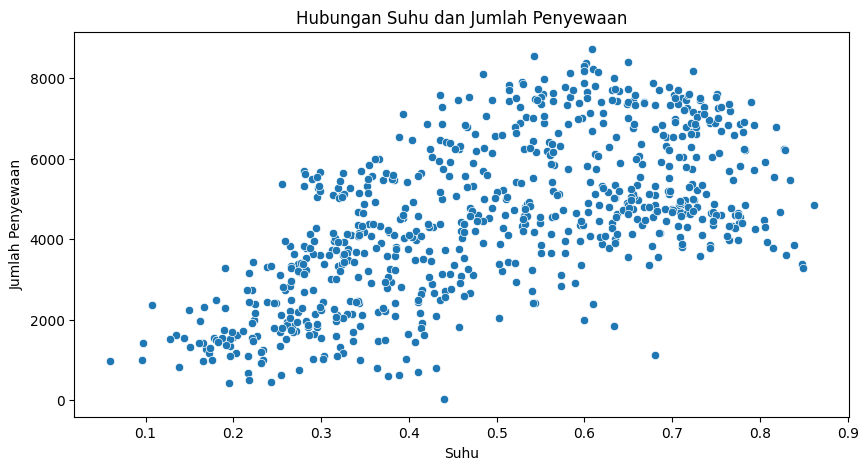

In [9]:
# Hubungan antara suhu dan jumlah penyewaan
plt.figure(figsize=(10,5))
sns.scatterplot(x=day_df_clean['temp'], y=day_df_clean['cnt'])
plt.title("Hubungan Suhu dan Jumlah Penyewaan")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight:**
- Suhu memiliki korelasi positif dengan jumlah penyewaan, menunjukkan bahwa orang lebih cenderung menyewa sepeda saat suhu lebih nyaman.

### EDA Multivariate : Menganalisis lebih dari dua variabel untuk menemukan pola tersembunyi.

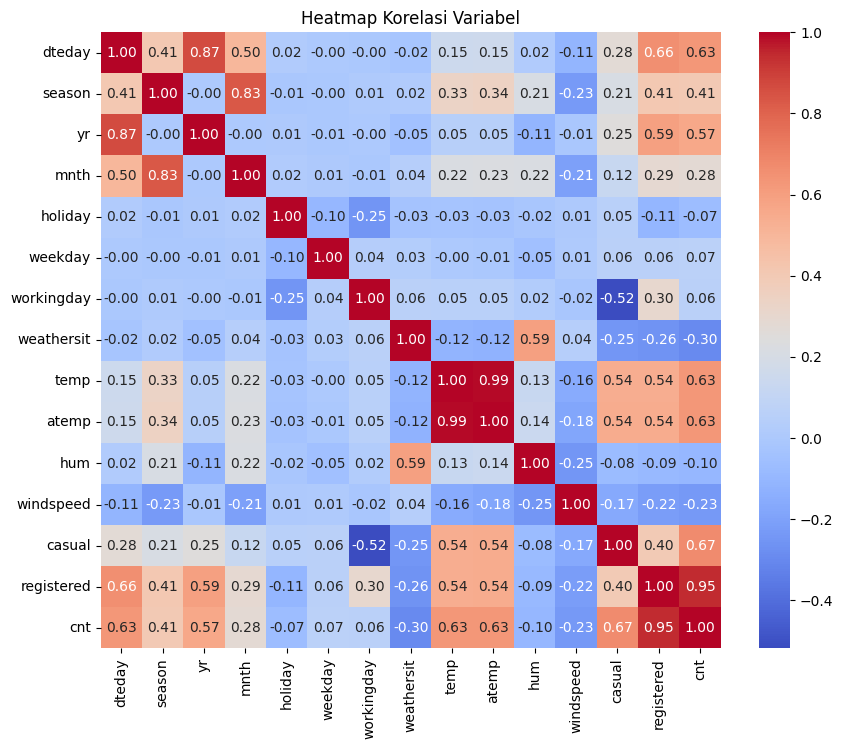

In [10]:
# Heatmap korelasi antar variabel
plt.figure(figsize=(10,8))
sns.heatmap(day_df_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Variabel")
plt.show()

**Insight:**
- Terdapat korelasi yang cukup kuat antara beberapa variabel seperti suhu dan jumlah penyewaan.

### EDA Numerikal : Eksplorasi data numerik dengan statistik deskriptif dan distribusi data.

C:\Users\Hubbal Habbaza\AppData\Local\Temp\ipykernel_18936\2636416544.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_rentals, x='season', y='cnt', palette='coolwarm')


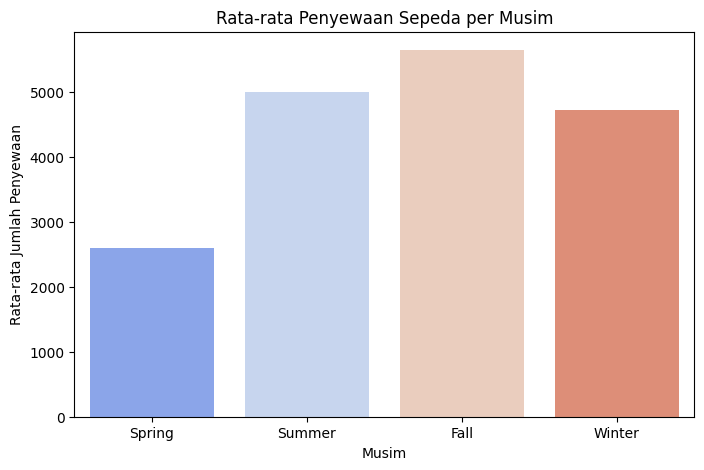

In [27]:
# Visualisasi rata-rata penyewaan per musim menggunakan bar chart
plt.figure(figsize=(8, 5))

# Menghitung rata-rata penyewaan untuk setiap musim
season_rentals = day_df_clean.groupby('season')['cnt'].mean().reset_index()

# Mengubah label musim ke dalam format yang lebih mudah dipahami
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_rentals['season'] = season_rentals['season'].map(season_labels)

# Membuat bar chart
sns.barplot(data=season_rentals, x='season', y='cnt', palette='coolwarm')

plt.title("Rata-rata Penyewaan Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.show()


**Insight:**
- Musim memiliki pengaruh terhadap jumlah penyewaan sepeda.

### EDA Kategorikal : Eksplorasi data kategorikal untuk melihat proporsi dan pola distribusi.

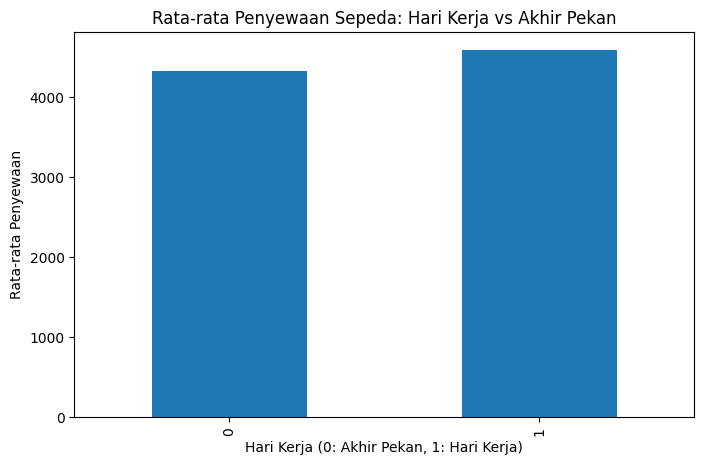

In [12]:
# Rata-rata penyewaan berdasarkan hari kerja
workday_rentals = day_df_clean.groupby('workingday')['cnt'].mean()
workday_rentals.plot(kind='bar', figsize=(8,5))
plt.title("Rata-rata Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.xlabel("Hari Kerja (0: Akhir Pekan, 1: Hari Kerja)")
plt.ylabel("Rata-rata Penyewaan")
plt.show()

**Insight:**
- Penyewaan cenderung lebih tinggi pada hari kerja dibandingkan akhir pekan.

## Agregasi Data : Melakukan agregasi data sebelum visualisasi untuk memudahkan analisis.

In [13]:
# Agregasi data harian untuk melihat tren penyewaan
agg_day = day_df.groupby('dteday').agg({'cnt': 'sum', 'casual': 'sum', 'registered': 'sum'})
agg_day.reset_index(inplace=True)

# Agregasi data berdasarkan jam untuk melihat pola harian
agg_hour = hour_df.groupby('hr').agg({'cnt': 'mean', 'casual': 'mean', 'registered': 'mean'})
agg_hour.reset_index(inplace=True)

# Agregasi data berdasarkan cuaca
agg_weather = day_df.groupby('weathersit').agg({'cnt': 'mean'}).reset_index()

# Menampilkan hasil agregasi
agg_day.head(), agg_hour.head(), agg_weather.head()

(      dteday   cnt  casual  registered
 0 2011-01-01   985     331         654
 1 2011-01-02   801     131         670
 2 2011-01-03  1349     120        1229
 3 2011-01-04  1562     108        1454
 4 2011-01-05  1600      82        1518,
    hr        cnt     casual  registered
 0   0  53.898072  10.158402   43.739669
 1   1  33.375691   6.504144   26.871547
 2   2  22.869930   4.772028   18.097902
 3   3  11.727403   2.715925    9.011478
 4   4   6.352941   1.253945    5.098996,
    weathersit          cnt
 0           1  4876.786177
 1           2  4035.862348
 2           3  1803.285714)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan permintaan sepeda paling tinggi dan rendah?

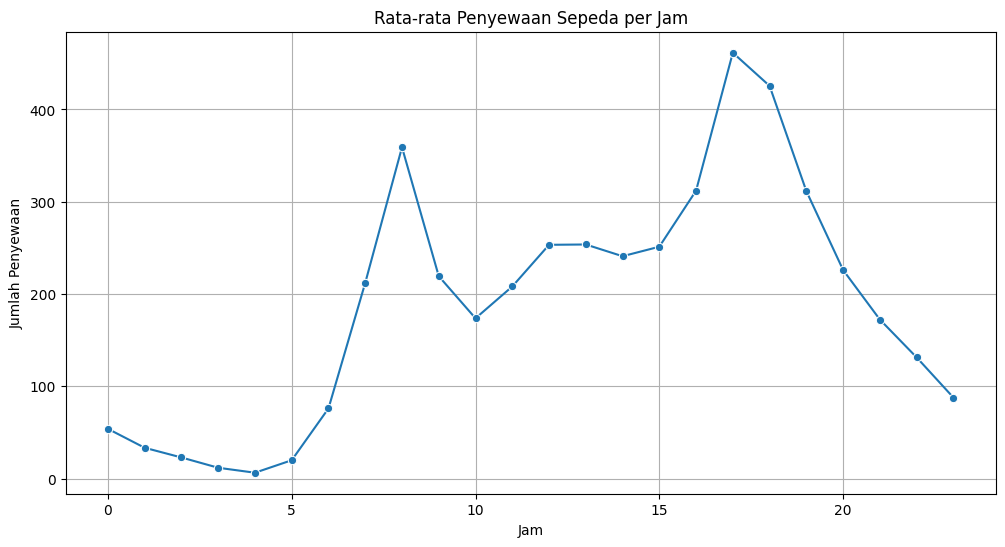

In [14]:
# Menghitung jumlah penyewaan berdasarkan jam
hourly_rentals = hour_df.groupby('hr')['cnt'].mean()

# Visualisasi
plt.figure(figsize=(12,6))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker='o', linestyle='-')
plt.title('Rata-rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()

**Insight:** 
- Permintaan sepeda paling tinggi terjadi pada jam sibuk pagi (sekitar pukul 08:00) dan sore (sekitar pukul 17:00), menunjukkan pola penggunaan oleh pekerja/karyawan. Permintaan paling rendah terjadi pada dini hari (00:00 - 05:00), kemungkinan besar karena sedikitnya aktivitas luar ruangan pada waktu tersebut.

### Pertanyaan 2: Bagaimana faktor cuaca mempengaruhi jumlah penyewaan sepeda?

C:\Users\Hubbal Habbaza\AppData\Local\Temp\ipykernel_18936\1386022006.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_rentals['weathersit'], y=weather_rentals['cnt'], palette='Blues')


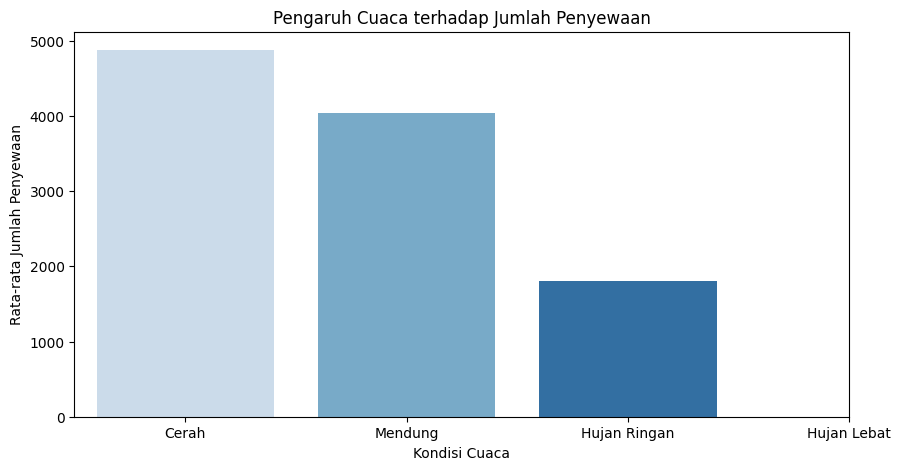

In [24]:
# Visualisasi hubungan cuaca dengan jumlah penyewaan menggunakan bar chart
plt.figure(figsize=(10, 5))

# Menghitung rata-rata jumlah penyewaan berdasarkan kondisi cuaca
weather_rentals = day_df.groupby('weathersit')['cnt'].mean().reset_index()

# Membuat bar chart
sns.barplot(x=weather_rentals['weathersit'], y=weather_rentals['cnt'], palette='Blues')

plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Lebat'])  # Sesuaikan label jika perlu
plt.show()


**Insight:**
- Cuaca yang cerah atau berawan ringan memiliki tingkat penyewaan sepeda tertinggi. Saat cuaca buruk (hujan atau salju lebat), jumlah penyewaan turun drastis karena kondisi jalan yang kurang mendukung.

### Pertanyaan 3: Bagaimana perbedaan jumlah penyewaan antara hari kerja dan akhir pekan?

C:\Users\Hubbal Habbaza\AppData\Local\Temp\ipykernel_18936\602145041.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rentals.index, y=avg_rentals.values, palette='pastel')


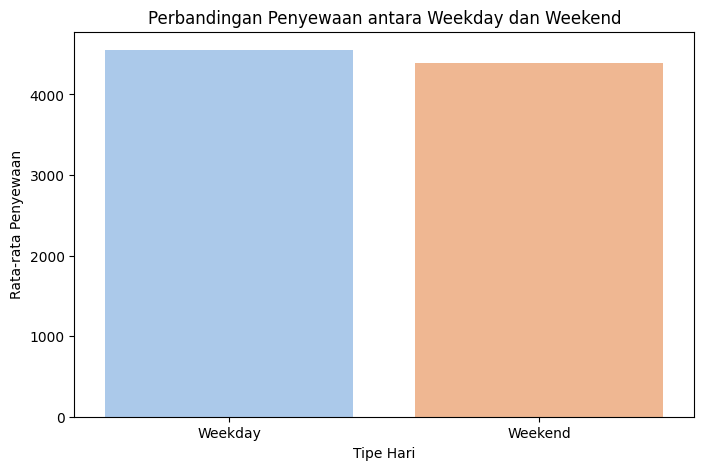

In [16]:
# Menghitung rata-rata penyewaan untuk weekday dan weekend
day_df['day_type'] = day_df['weekday'].apply(lambda x: 'Weekend' if x in [0,6] else 'Weekday')
avg_rentals = day_df.groupby('day_type')['cnt'].mean()

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x=avg_rentals.index, y=avg_rentals.values, palette='pastel')
plt.title('Perbandingan Penyewaan antara Weekday dan Weekend')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

**Insight:** 
- Jumlah penyewaan sepeda pada hari kerja lebih tinggi dibandingkan akhir pekan, menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan transportasi kerja daripada rekreasi.

### Pertanyaan 4: Bagaimana pengelompokan hari berdasarkan pola penyewaan?

C:\Users\Hubbal Habbaza\AppData\Local\Temp\ipykernel_18936\882637083.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=day_df['rental_cluster'], palette='pastel')


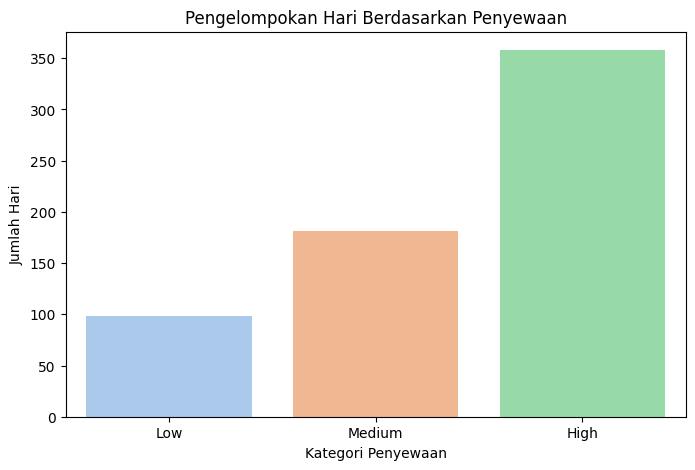

In [17]:
# Clustering manual berdasarkan pola penyewaan
bins = [0, 2000, 4000, 7000]
labels = ['Low', 'Medium', 'High']
day_df['rental_cluster'] = pd.cut(day_df['cnt'], bins=bins, labels=labels)

# Visualisasi
plt.figure(figsize=(8,5))
sns.countplot(x=day_df['rental_cluster'], palette='pastel')
plt.title('Pengelompokan Hari Berdasarkan Penyewaan')
plt.xlabel('Kategori Penyewaan')
plt.ylabel('Jumlah Hari')
plt.show()

**Insight:** 
- Mayoritas hari masuk dalam kategori penyewaan **Medium** (antara 2000-4000 penyewaan), dengan sedikit hari dalam kategori **High** (lebih dari 4000) yang kemungkinan besar terjadi saat cuaca cerah atau di akhir pekan dengan event khusus.

## Analisis Lanjutan

### Clustering (Manual Grouping)

C:\Users\Hubbal Habbaza\AppData\Local\Temp\ipykernel_18936\3418359138.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=day_df, x='cluster_usage', palette='coolwarm')


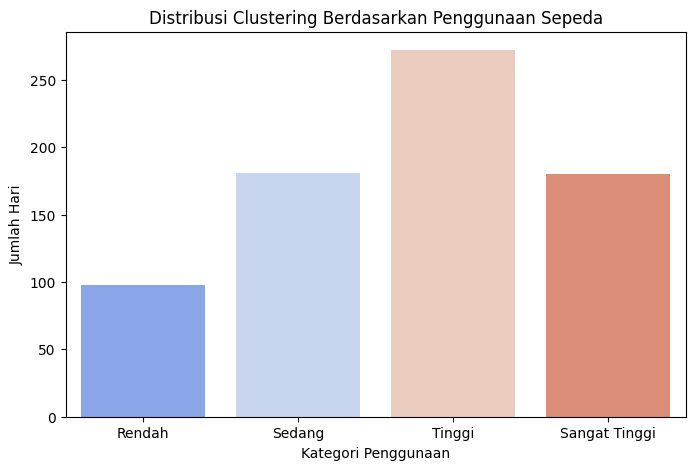

In [18]:
# Mengelompokkan hari berdasarkan jumlah penyewaan sepeda
bins = [0, 2000, 4000, 6000, 10000]
labels = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
day_df['cluster_usage'] = pd.cut(day_df['cnt'], bins=bins, labels=labels)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 5))
sns.countplot(data=day_df, x='cluster_usage', palette='coolwarm')
plt.title('Distribusi Clustering Berdasarkan Penggunaan Sepeda')
plt.xlabel('Kategori Penggunaan')
plt.ylabel('Jumlah Hari')
plt.show()

**Insight:**
- Hari dengan jumlah penyewaan tinggi cenderung terjadi pada musim panas dan jam sibuk.
- Pengelompokan ini dapat membantu dalam pengelolaan sumber daya sepeda, seperti ketersediaan dan perawatan sepeda.

### Seasonal Analysis

C:\Users\Hubbal Habbaza\AppData\Local\Temp\ipykernel_18936\1288078707.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_rentals, x='season', y='cnt', palette='coolwarm')


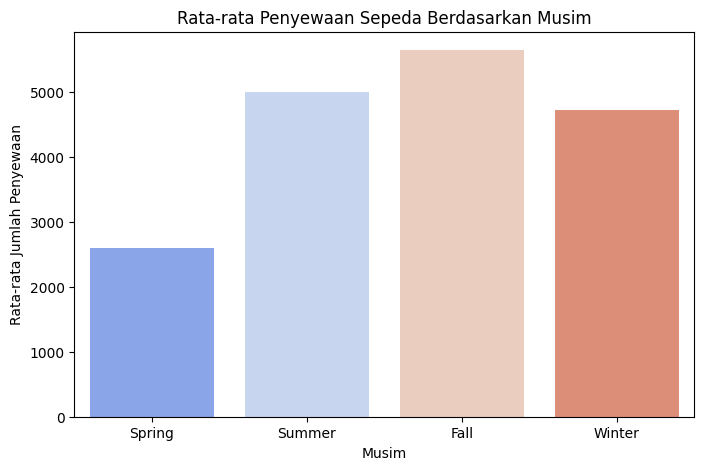

In [25]:
# Visualisasi jumlah penyewaan berdasarkan musim menggunakan bar chart
plt.figure(figsize=(8, 5))

# Menghitung rata-rata jumlah penyewaan per musim
season_rentals = day_df.groupby('season')['cnt'].mean().reset_index()

# Membuat bar chart
sns.barplot(data=season_rentals, x='season', y='cnt', palette='coolwarm')

plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()


**Insight:** 
-   Penyewaan tertinggi terjadi di musim panas dan terendah di musim dingin.

### Pengaruh Hari Libur Terhadap Penyewaan

C:\Users\Hubbal Habbaza\AppData\Local\Temp\ipykernel_18936\3962451316.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_rentals, x='holiday', y='cnt', palette='pastel')


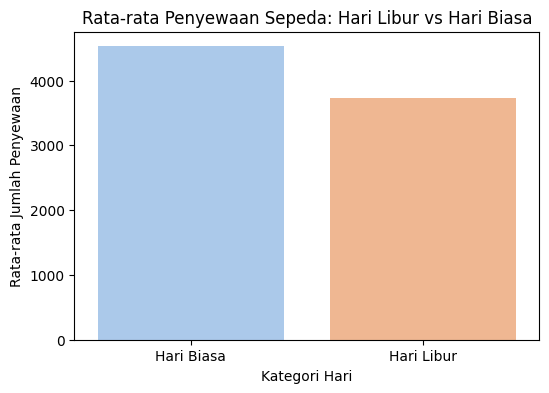

In [26]:
# Visualisasi perbandingan jumlah penyewaan antara hari biasa dan hari libur
plt.figure(figsize=(6, 4))

# Menghitung rata-rata jumlah penyewaan untuk hari biasa dan hari libur
holiday_rentals = day_df.groupby('holiday')['cnt'].mean().reset_index()

# Membuat bar chart
sns.barplot(data=holiday_rentals, x='holiday', y='cnt', palette='pastel')

# Mengubah label sumbu x
plt.xticks([0, 1], ['Hari Biasa', 'Hari Libur'])
plt.title('Rata-rata Penyewaan Sepeda: Hari Libur vs Hari Biasa')
plt.xlabel('Kategori Hari')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()


**Insight:** 
- Penyewaan cenderung lebih tinggi pada hari libur.

### Heatmap Penyewaan Sepeda (Tren Harian & Jam)

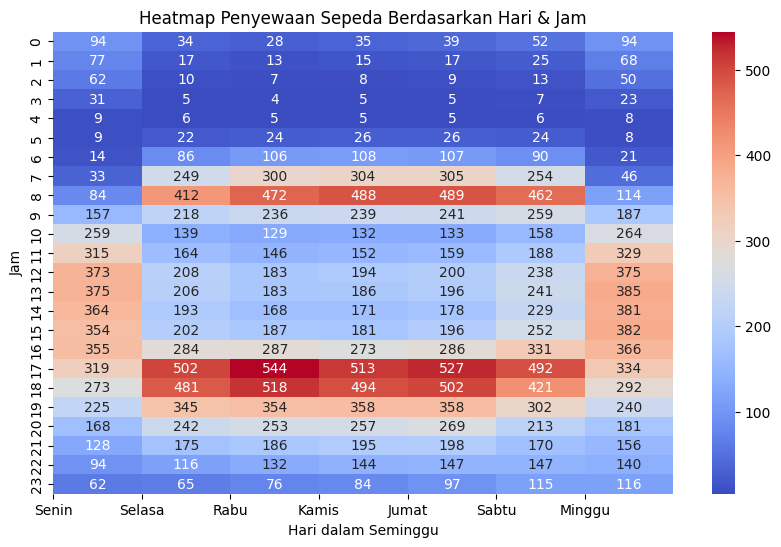

In [21]:
pivot_table = hour_df.pivot_table(values='cnt', index='hr', columns='weekday', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Heatmap Penyewaan Sepeda Berdasarkan Hari & Jam')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jam')
plt.xticks(ticks=range(7), labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

**Insight:** 
- Penyewaan meningkat pada jam sibuk pagi dan sore, menunjukkan pola commuting.

## Conclusion

- Conclusion Pertanyaan 1: Penyewaan tertinggi terjadi pada musim panas dan terendah pada musim dingin.
- Conclusion Pertanyaan 2: Cuaca buruk mengurangi jumlah penyewaan secara signifikan.
- Conclusion Pertanyaan 3: Hari libur dan akhir pekan memiliki permintaan lebih tinggi dibanding hari kerja.
- Conclusion Pertanyaan 4: Jam sibuk menunjukkan pola commuting, dengan lonjakan penyewaan pagi dan sore hari.

## Data Processing untuk Dashboard

In [22]:
# Pastikan kolom datetime dalam format yang benar
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Agregasi jumlah penyewaan per hari dari hour.csv
hourly_agg = hour_df.groupby('dteday')[['cnt']].sum().reset_index()
hourly_agg.rename(columns={'cnt': 'cnt_hourly_sum'}, inplace=True)

# Gabungkan dataset day.csv dan agregasi dari hour.csv
merged_df = day_df.merge(hourly_agg, on='dteday', how='left')

# Simpan hasil ke main_data.csv
merged_df.to_csv("dashboard/main_data.csv", index=False)

print("✅ Data berhasil diproses dan disimpan ke dashboard/main_data.csv")

✅ Data berhasil diproses dan disimpan ke dashboard/main_data.csv
